In [22]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Model creation
(Upload dataframe)
1. numerical Varibales only - > drop other columns
2. scale
3. train kmeans + (pickle)
create model

### User Input
- User inputs song
- search the song - > ID
- Audio features of the song
- scale
- predict the cluster
- recommand a song from the cluster. Input track ID into the integrated player

#### Loading the  combined spotify dataset

In [23]:
df_combined = pd.read_csv('df_combined.csv')

### Use numerical columns only

In [25]:
columns_numerical = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo']

df_combined_numerical = df_combined[columns_numerical]

In [26]:
X = df_combined_numerical

### Scaling

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [30]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03,8.887000e+03
mean,-4.285483e-16,-3.933690e-16,7.475610e-17,-6.396244e-17,-1.599061e-17,4.477371e-17,2.398591e-16,-1.918873e-17,1.019401e-16,-4.893127e-16,6.092422e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.431159e+00,-2.861366e+00,-1.462468e+00,-1.346158e+01,-1.324046e+00,-9.440292e-01,-9.175969e-01,-3.948318e-01,-1.091874e+00,-2.057268e+00,-4.248285e+00
25%,-6.968676e-01,-6.954302e-01,-9.047424e-01,-5.206510e-01,-1.324046e+00,-5.388507e-01,-8.309590e-01,-3.948318e-01,-6.080738e-01,-8.156256e-01,-7.561734e-01
50%,7.509832e-02,1.117003e-01,-6.815456e-02,1.859300e-01,7.552608e-01,-4.041849e-01,-4.154511e-01,-3.944273e-01,-4.085747e-01,5.524385e-03,-1.622793e-02
75%,7.409926e-01,8.048293e-01,7.684332e-01,7.131241e-01,7.552608e-01,6.899985e-03,6.206665e-01,-3.404172e-01,3.113303e-01,8.227075e-01,6.066379e-01
max,2.337960e+00,1.694041e+00,1.605021e+00,2.444326e+00,7.552608e-01,8.884208e+00,2.600960e+00,3.998481e+00,4.893099e+00,1.866004e+00,3.246507e+00


### Train Kmeans

In [31]:
kmeans = KMeans(n_clusters=15, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=15, random_state=1234)

In [32]:
labels = kmeans.labels_
labels

array([2, 2, 9, ..., 3, 5, 5])

In [33]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [34]:
clusters = kmeans.predict(X_scaled_df)
clusters

array([2, 2, 9, ..., 3, 5, 5])

In [13]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     357
1     584
2     434
3     521
4     165
5     632
6     530
7     427
8     588
9     465
10    201
11    351
12    719
13    297
14    259
15    283
16    434
17    494
18    465
19    681
Name: count, dtype: int64

In [35]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

C:\Users\flori\AppData\Local\Temp\ipykernel_2436\3390344749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.697,0.832,9,-7.264,1,0.0298,0.168000,0.001310,0.2690,0.979,125.926,2
1,0.645,0.795,7,-12.095,1,0.0527,0.347000,0.003890,0.1040,0.535,112.067,2
2,0.629,0.545,10,-13.123,0,0.0546,0.719000,0.003080,0.0604,0.194,108.376,9
3,0.650,0.306,9,-9.443,1,0.0393,0.570000,0.000007,0.0707,0.605,118.068,8
4,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8882,0.490,0.352,6,-11.577,0,0.0254,0.709000,0.085600,0.1140,0.166,99.992,9
8883,0.527,0.591,6,-7.664,0,0.0396,0.194000,0.019400,0.0907,0.461,123.167,7
8884,0.420,0.837,2,-5.240,1,0.0610,0.215000,0.000030,0.0876,0.196,75.043,3
8885,0.648,0.594,11,-7.027,0,0.0293,0.114000,0.046200,0.1160,0.544,113.983,5


### Training the model / Chosing K

Training a K-Means model with 2 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



C:\Users\flori\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

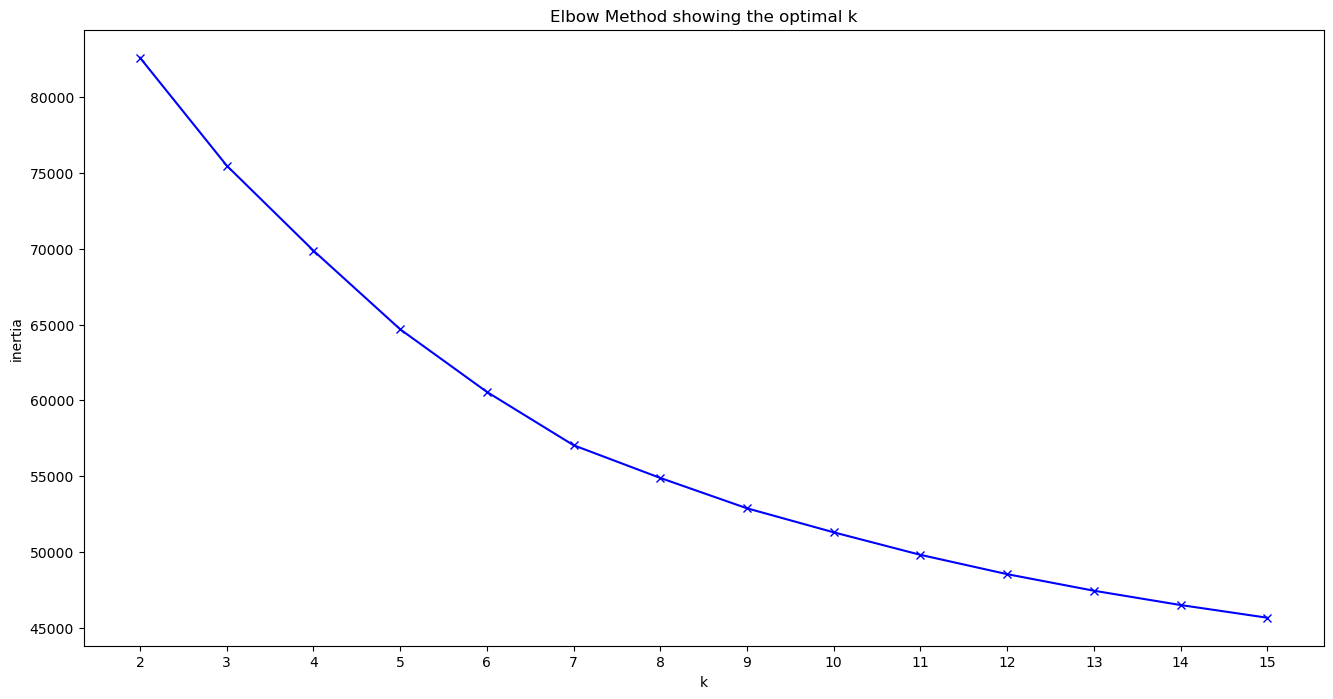

In [36]:
K = range(2, 16)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

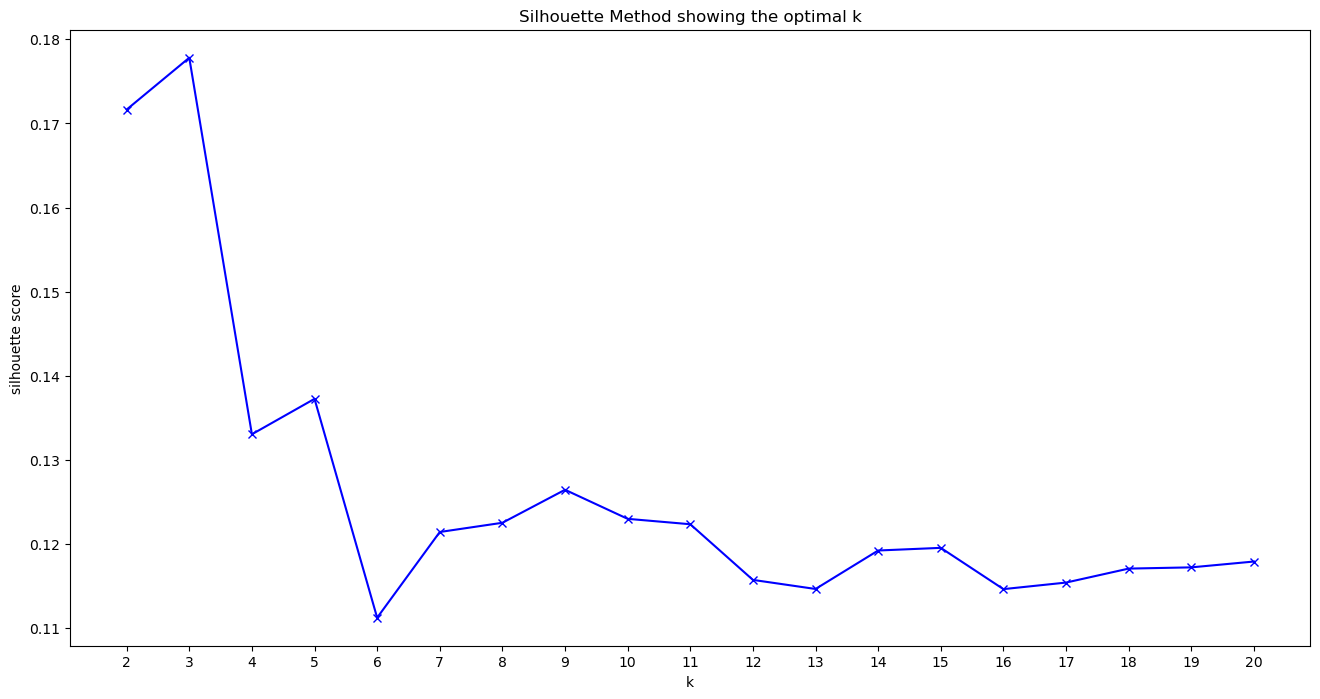

In [17]:
K = range(2, 16)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [47]:
'''def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(model, f)
def load(filename = "filename.pickle"):
    try:
        with open(filename, "rb") as f:
           return pickle.load(f)
    except FileNotFoundError:
             print("File not found!")'''

In [49]:
''''''save(kmeans, "model.pickle")''''''

#### User Input

User inputs song
search the song - > ID
Audio features of the song
scale
predict the cluster
recommand a song from the cluster. Input track ID into the integrated player

In [37]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
import config
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
from IPython.display import display, HTML

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [38]:
# Import Top 100 DF
top100_df= pd.read_csv('top100_songs.csv')

### Final recommender

In [41]:
while True:
    # Input a song title
    user_input = input("Enter a song title: ")

    # User input song
    user_input_lower = user_input.lower()
    # song titles to lowercase
    top100_df['Song_lower'] = top100_df['Song'].str.lower()

    # Check if user input is an exact match or a fuzzy match
    exact_match = user_input_lower in top100_df['Song_lower'].values
    fuzzy_match = top100_df['Song_lower'].apply(lambda x: fuzz.partial_ratio(user_input_lower, x) > 80).any()

    if exact_match or fuzzy_match:
        print(f"{user_input} is hot!")

        # Recommend another song
        recommended_song = top100_df[top100_df['Song_lower'] != user_input_lower].sample(1)[['Song', 'Artist']].values[0]
        recommended_song_title, recommended_artist = recommended_song

        print(f"You might like this song as well: {recommended_song_title.capitalize()} by {recommended_artist.capitalize()}")
        
        # Get the track ID for the recommended song from Spotify
        results = sp.search(q=f"{recommended_song_title} {recommended_artist}", limit=1, market="GB")
        track_id = results["tracks"]["items"][0]["id"]

        # Embed the player
        iframe_code = f'<iframe src="https://open.spotify.com/embed/track/{track_id}" width="320" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>'
        display(HTML(iframe_code))
        
        # Drop temporary column 
        top100_df.drop(columns=['Song_lower'], inplace=True)
        
        break 
    else:
        print(f"Sorry, the song '{user_input}' is not hot. If you want to listen to it anyway:")
         # Drop temporary column
        top100_df.drop(columns=['Song_lower'], inplace=True)
        results = sp.search(q={user_input},limit=5)
        track_id=results["tracks"]["items"][0]["id"]
        
        # Embed the player to show song (user input)
        iframe_code = f'<iframe src="https://open.spotify.com/embed/track/{track_id}" width="320" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>'
        display(HTML(iframe_code))
        
        print("But I recommend playing this similar song. I am sure you will love it")
        
        audio_feautures = sp.audio_features(track_id)
        df_song_userinput = pd.DataFrame(audio_feautures)
        # drop non numerical columns
        columns_numerical_song = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
        df_song_userinput = df_song_userinput[columns_numerical_song]
        #Scaling song features
        X_song = df_song_userinput
        X_song_scaled = scaler.transform(X_song)
        X_song_scaled_df = pd.DataFrame(X_song_scaled, columns = X_song.columns)
        # Predict cluster
        cluster_pred = kmeans.predict(X_song_scaled_df)
        cluster_pred = cluster_pred.item()
        # Pull sample of predicted cluster
        song_rec = X[X['cluster'] == cluster_pred].sample() 
        # get Index of recommended song: 
        song_rec.index[0]
        song_to_play = df_combined.loc[song_rec.index[0]]
        ##Extract Track ID song to play
        song_to_play_ID = song_to_play['id']
        # Embed the player
        iframe_code = f'<iframe src="https://open.spotify.com/embed/track/{song_to_play_ID}" width="320" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>'
        display(HTML(iframe_code))
        break


Enter a song title: Hello
Sorry, the song 'Hello' is not hot. If you want to listen to it anyway:


C:\Users\flori\anaconda4\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


But I recommend playing this similar song. I am sure you will like it better


C:\Users\flori\anaconda4\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
